In [43]:
# ! pip install mysql-connector-python
import mysql.connector
import pandas as pd
import numpy as np


In [13]:
connection = mysql.connector.connect(
user='root',
password='1234',
host='localhost',
database='unicorn_companies'
)

In [14]:
cursor = connection.cursor()

In [15]:
cursor.execute('select * from UnicornCom')
unicorn_companie = pd.DataFrame(cursor. fetchall(), columns=[desc[0] for desc in cursor.description])
print(unicorn_companie.head(5))

     Company Valuation Date Joined                         Industry  \
0  Bytedance     $180B  2017-04-07          Artificial intelligence   
1     SpaceX     $100B  2012-12-01                            Other   
2      SHEIN     $100B  2018-07-03  E-commerce & direct-to-consumer   
3     Stripe      $95B  2014-01-23                          Fintech   
4     Klarna      $46B  2011-12-12                          Fintech   

            City        Country      Continent  Year Founded Funding  \
0        Beijing          China           Asia          2012     $8B   
1      Hawthorne  United States  North America          2002     $7B   
2       Shenzhen          China           Asia          2008     $2B   
3  San Francisco  United States  North America          2010     $2B   
4      Stockholm         Sweden         Europe          2005     $4B   

                                    Select Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fishe

<h2 style="color:#FFEFD5"><b>CASE STUDIES</b></h2>

<h3 style="color:#99FFCC"><b>1. Which industries have the most unicorns? </b></h3>

In [16]:
query = '''   
    SELECT Industry, COUNT(*) AS Unicorn_Count
    FROM UnicornCom
    GROUP BY Industry
    ORDER BY Unicorn_Count DESC;

'''

# Assuming 'connection' is a valid pyodbc connection object
df = pd.read_sql(query, con=connection)

# Display the first few rows of the DataFrame
print(df.head())

                          Industry  Unicorn_Count
0                          Fintech            224
1     Internet software & services            205
2  E-commerce & direct-to-consumer            111
3          Artificial intelligence             84
4                           Health             74


C:\Users\deepa\AppData\Local\Temp\ipykernel_6228\3828600990.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


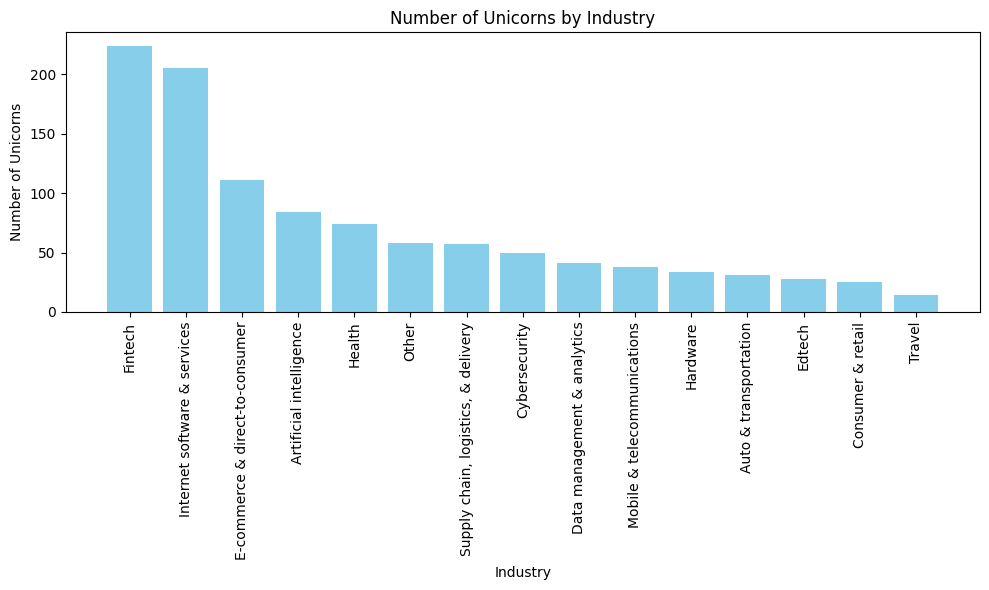

In [17]:
import matplotlib.pyplot as plt
# Plotting the data
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Industry'], df['Unicorn_Count'], color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns by Industry')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<p style="text-align:justify">Based on the analysis of unicorn companies across different industries, it is evident that the Fintech sector has the highest number of unicorns. This conclusion is drawn from the SQL query that aggregated the data and counted the occurrences of companies in each industry category. Fintech surpassed other industries in terms of the number of companies classified as unicorns, highlighting its strong presence and growth within the startup and technology sectors.

<h3 style="color:#99FFCC">2. Which countries have the most unicorns?

In [18]:
query = '''   
    SELECT Country, COUNT(*) AS Unicorn_Count
    FROM UnicornCom
    GROUP BY Country
    ORDER BY Unicorn_Count DESC;


'''

# Assuming 'connection' is a valid pyodbc connection object
df = pd.read_sql(query, con=connection)

# Display the first few rows of the DataFrame
print(df.head())

          Country  Unicorn_Count
0   United States            562
1           China            173
2           India             65
3  United Kingdom             43
4         Germany             26


C:\Users\deepa\AppData\Local\Temp\ipykernel_6228\2314797888.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


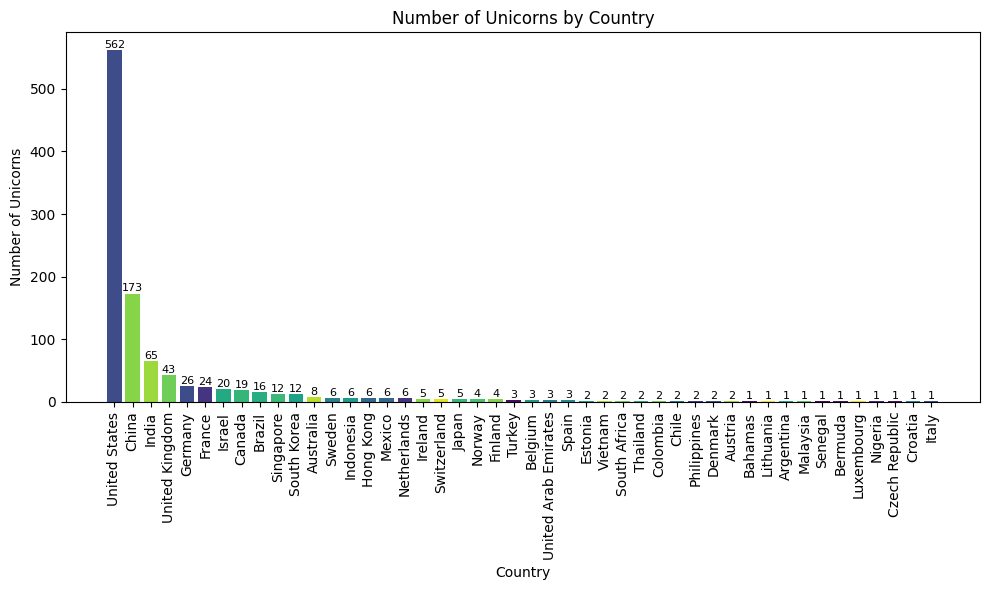

In [23]:
# Generate random colors
colors = np.random.rand(len(df))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Country'], df['Unicorn_Count'], color=plt.cm.viridis(colors))

plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate each bar with its count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

<p style="text-align:justify">Based on the analysis of unicorn startups by country from the dataset, the United States stands out with the highest number of unicorn companies. This conclusion is drawn from the SQL query that aggregated the data and counted the occurrences of companies grouped by country. The dominance of the United States in the unicorn startup ecosystem underscores its robust environment for innovation, investment, and technological advancement, positioning it as a leader in fostering successful high-value startups compared to other countries in the dataset.

<h4 style="color:#FFFFCC">3. Which unicorn companies have had the biggest return on investment?

In [33]:
query = '''   
    SELECT Company, Valuation, Funding
    FROM UnicornCom
    ORDER BY (CAST(Valuation AS DECIMAL(10,2)) / CAST(REPLACE(Funding, '$', '') AS DECIMAL(10,2))) DESC;
'''

# Assuming 'connection' is a valid pyodbc connection object
df = pd.read_sql(query, con=connection)

# Display the first few rows of the DataFrame
print(df.head())

     Company Valuation Funding
0  Bytedance     $180B     $8B
1     SpaceX     $100B     $7B
2      SHEIN     $100B     $2B
3     Stripe      $95B     $2B
4     Klarna      $46B     $4B


C:\Users\deepa\AppData\Local\Temp\ipykernel_6228\329408361.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


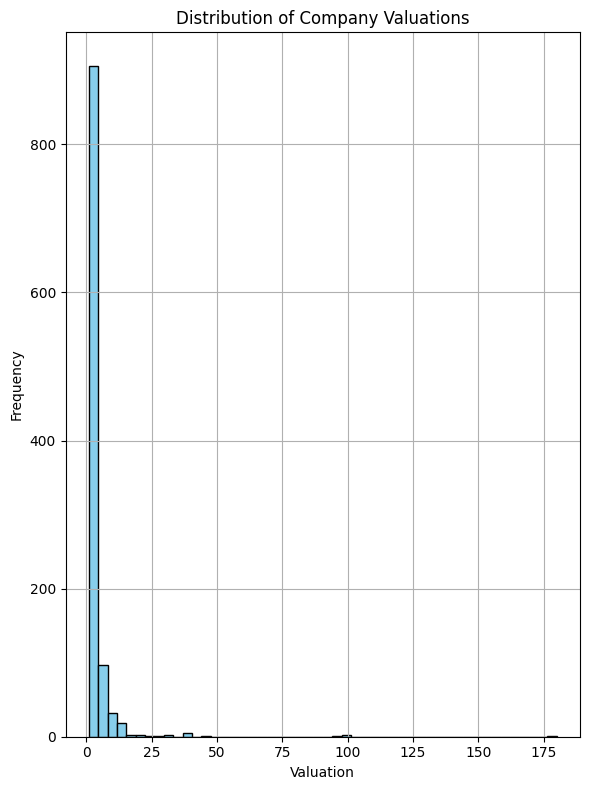

In [40]:
# Plotting histogram
plt.figure(figsize=(6, 8))
plt.hist(df['Valuation'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Valuation')
plt.ylabel('Frequency')
plt.title('Distribution of Company Valuations')
plt.grid(True)
plt.tight_layout()
plt.show()

<p style="text-align:justify" >Bytedance stands out with an impressive return on investment of 22.5 based on its valuation of $180B against a funding of $8B. This high ROI underscores Bytedance's success and growth in the market, reflecting significant value creation relative to its initial investment.

<h4 style="color:#FFCC99"> 4. Which investors have funded the most unicorns?

In [58]:
query = '''   
    SELECT `Select Investors` AS Investor_Name, COUNT(*) AS Unicorn_Count
    FROM UnicornCom
    GROUP BY `Select Investors`
    ORDER BY Unicorn_Count DESC
    LIMIT 10;


'''

# Assuming 'connection' is a valid pyodbc connection object
df = pd.read_sql(query, con=connection)

# Display the first few rows of the DataFrame
print(df.head())

                                       Investor_Name  Unicorn_Count
0                                    Sequoia Capital              3
1  Two Sigma Ventures, Flint Capital, Commerce Ve...              2
2  Insight Partners, Sequoia Capital, Index Ventures              2
3  Global Founders Capital, Shea Ventures, Greycroft              2
4        Speedinvest, Valar Ventures, Uniqa Ventures              2


C:\Users\deepa\AppData\Local\Temp\ipykernel_6228\3025360192.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


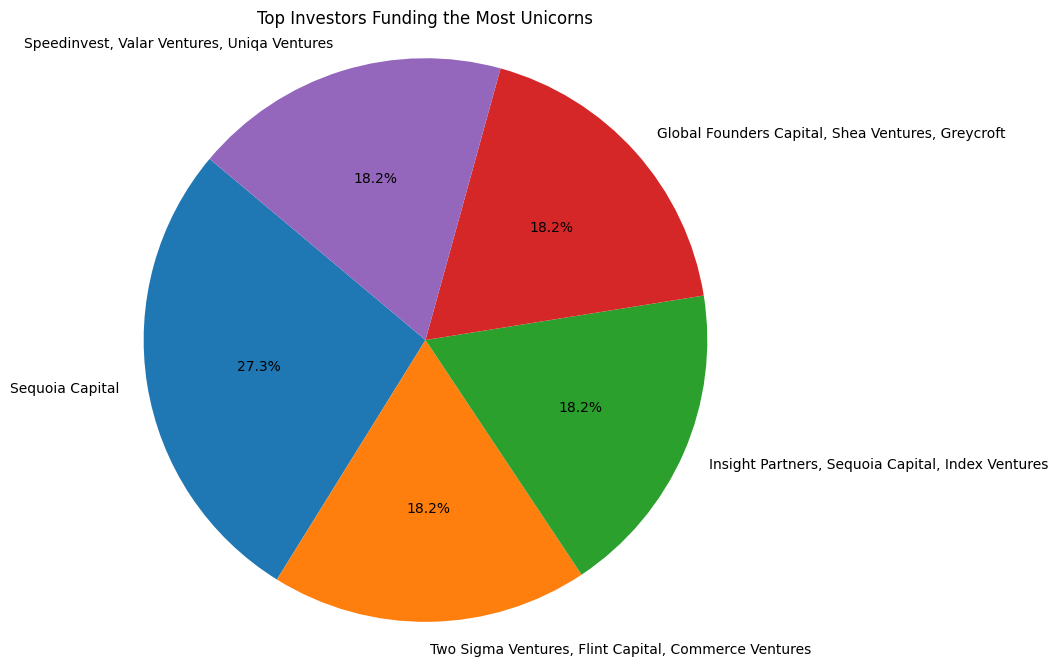

In [62]:
# Data (example data based on your provided sample)
investors = ['Sequoia Capital', 
             'Two Sigma Ventures, Flint Capital, Commerce Ventures', 
             'Insight Partners, Sequoia Capital, Index Ventures', 
             'Global Founders Capital, Shea Ventures, Greycroft', 
             'Speedinvest, Valar Ventures, Uniqa Ventures']
unicorn_counts = [3, 2, 2, 2, 2]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(unicorn_counts, labels=investors, autopct='%1.1f%%', startangle=140)
plt.title('Top Investors Funding the Most Unicorns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<p style="text-align:justify" >Sequoia Capital stands out with the highest number of unicorns funded among the listed investors, demonstrating their strong track record and influence in the startup ecosystem. The presence of several investor groups funding 2 unicorns each suggests a diversified approach and involvement across various sectors, contributing significantly to the growth of unicorn companies.